In [1]:
# Installation des librairies
# !pip install unidecode wordcloud nltk

import re
from unidecode import unidecode
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict

In [2]:
# L'article de presse provenant de https://www.lesechos.fr/economie-france/social/cinq-ans-apres-le-covid-lactivite-hospitaliere-retrouve-des-couleurs-2154382
article = """
Cinq ans après le Covid, l'activité hospitalière « retrouve des couleurs »
Le nombre de séjours à l'hôpital a augmenté de 3,7 % en 2024, selon le baromètre annuel de la Fédération hospitalière de France, permettant de résorber une partie du retard pris pendant la crise sanitaire.
L'activité hospitalière « retrouve des couleurs ». Dans la deuxième édition de son baromètre sur l'accès aux soins publiée ce lundi, cinq ans jour pour jour après l'entrée en vigueur du premier confinement pour faire face à l'épidémie de Covid, la Fédération hospitalière de France (FHF) estime qu'il y a eu 516.000 séjours à l'hôpital de plus qu'attendu en 2024.
Le nombre de séjours hospitaliers a augmenté de 3,7 %, et même de 4,6 % à l'hôpital public. Pour la première fois depuis 2020, « la dette de santé publique commence à se résorber », s'est félicité son président, Arnaud Robinet.
Entre 2019 et 2023, compte tenu notamment des perturbations liées au Covid, quelque 3,5 millions de séjours hospitaliers n'avaient pas pu être réalisés. Une situation qui serait synonyme de retard dans la prise en charge de certains cancers et du suivi des personnes âgées. La reprise constatée l'an dernier concerne toutes les classes d'âges à l'exception des plus de 85 ans qui continuent d'être en situation de sous recours (-6 % par rapport aux niveaux attendus).

Un retard important dans les chirurgies lourdes
Certaines disciplines, comme la neurologie, la rhumatologie, le cardio-vasculaire ou les prises en charge digestives restent cependant en difficulté. « Elles représentent un tiers des activités de médecine, pour un total de 180.000 séjours non réalisés », a indiqué la FHF. Un sous-recours est également constaté pour les chirurgies lourdes pour toutes les classes d'âges confondues. « Ce sont en tout 700.000 séjours de chirurgie qui n'ont pas été réalisés depuis 2020 », a-t-elle également alerté.
Autre point positif, dans son baromètre, la FHF constate que 37 % d'hôpitaux se sont déclarés « en tension » en 2024, soit une quarantaine de moins que l'année précédente. Ils sont également une cinquantaine d'hôpitaux en moins à avoir déclenché des plans blancs, ce protocole prévu par les autorités de santé pour faire face à ces situations exceptionnelles. Le rythme des fermetures de lits diminue aussi et de nombreux établissements anticipent des réouvertures dans certains secteurs en 2025.

« Tous les voyants sont au rouge écarlate »
Pour autant, « cette amorce de rémission n'efface pas la dégradation continue de l'accès aux soins des dernières années », a prévenu Arnaud Robinet. Le président de la FHF a notamment rappelé que « sur le plan financier, à l'hôpital comme dans les Ehpad publics, tous les voyants sont au rouge écarlate », avec un déficit atteignant 2,8 milliards d'euros fin 2024. Et l'accès aux soins se dégrade : selon un sondage Ipsos commandé par la FHF, plus de deux tiers des répondants déclarent avoir renoncé à au moins un acte de soins ces cinq dernières années. Deux sur trois (65 %) disent aussi « avoir peur d'être hospitalisés » au vu de la situation actuelle.
« Nous sommes à un tournant […], ou bien nous changeons de logiciel pour se donner les moyens d'amplifier la reprise », ou nous risquons « de voir notre système de santé s'affaiblir encore davantage », a-t-il averti.
En matière de financement, celui qui est aussi le maire (Horizons) de Reims a appelé l'Etat à soutenir cette « reprise ». Il propose la création d'un « Livret H », sur le modèle du Livret A utilisé pour le logement social. Ou encore un fonds vert destiné uniquement aux hôpitaux. Il remettra « aux pouvoirs publics en mai un cadre de loi de programmation en santé » car « le besoin d'une planification en santé n'a jamais été aussi urgent. »
"""

print(f"Longueur du texte : {len(article)} caractères.")

Longueur du texte : 3750 caractères.


In [3]:
# Mise en minuscule
text_lower = article.lower()

print(text_lower[:200] + "...") # On affiche les 200 premiers caractères


cinq ans après le covid, l'activité hospitalière « retrouve des couleurs »
le nombre de séjours à l'hôpital a augmenté de 3,7 % en 2024, selon le baromètre annuel de la fédération hospitalière de fra...


In [4]:
# Suppression des accents
text_no_accent = unidecode(text_lower)

print(text_no_accent[:200] + "...") # On affiche les 200 premiers caractères


cinq ans apres le covid, l'activite hospitaliere << retrouve des couleurs >>
le nombre de sejours a l'hopital a augmente de 3,7 % en 2024, selon le barometre annuel de la federation hospitaliere de f...


In [5]:
# Suppression des nombres (car ils sont très présents et, si nous les avions remplacés par 'annee' (ou 'nombre'), ces mots seraient devenu les plus 
# fréquents du texte, apparaissant en très grand dans le WordCloud)
text_no_numbers = re.sub(r'[0-9]+', '', text_no_accent)

# Suppression de la ponctuation et caractères spéciaux (ne garder que les lettres a-z)
# Le motif [^a-z] signifie "tout ce qui n'est pas une lettre minuscule"
text_clean_chars = re.sub(r'[^a-z\s]', ' ', text_no_numbers)

# Suppression des espaces multiples créés par les remplacements précédents
text_clean = re.sub(r'\s+', ' ', text_clean_chars).strip()

print(text_clean[:200] + "...") # On affiche les 200 premiers caractères

cinq ans apres le covid l activite hospitaliere retrouve des couleurs le nombre de sejours a l hopital a augmente de en selon le barometre annuel de la federation hospitaliere de france permettant de ...


In [6]:
# Tokenisation (découpage par espace)
tokens = text_clean.split()

# Liste des stopwords de base
base_stop_words = [
    'a', 'au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 
    'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'meme', 'mes', 'moi', 'mon', 'ne', 'nos', 
    'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 
    'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 
    'l', 'm', 'n', 's', 't', 'y', 'ete', 'etait', 'est', 'sont', 'ont', 'aussi', 'etre', 'avoir', 
    'faire', 'plus', 'moins', 'tres', 'bien'
]

# Ajout de stopwords spécifiques à l'article
# On enlève les mots de liaison temporels ou logiques pour ne garder que le sens
context_stop_words = [
    'apres', 'avant', 'depuis', 'selon', 'cette', 'celui', 'tout', 'tous', 'toute', 'toutes', 
    'car', 'ni', 'donc', 'or', 'si', 'comme', 'sans', 'sous', 'vers', 'chez', 'pendant', 
    'cependant', 'lors', 'contre', 'meme', 'aussi', 'ainsi', 'entre', 'soit', 'cette', 'cet'
]

# Fusion des listes
final_stop_words = set(base_stop_words + context_stop_words)

# Filtrage :
# Le mot ne doit pas être dans la liste des stopwords
# Le mot doit faire plus de 3 lettres (pour éviter les bruits comme 'an', 'eu'...)
tokens_filtered = [word for word in tokens if word not in final_stop_words and len(word) > 3]

print(f"Nombre de mots restants après filtrage : {len(tokens_filtered)}")
print(f"Aperçu des mots clés conservés : {tokens_filtered[:15]}")

Nombre de mots restants après filtrage : 278
Aperçu des mots clés conservés : ['cinq', 'covid', 'activite', 'hospitaliere', 'retrouve', 'couleurs', 'nombre', 'sejours', 'hopital', 'augmente', 'barometre', 'annuel', 'federation', 'hospitaliere', 'france']


In [7]:
# Dictionnaire de fréquences
freq = defaultdict(int)

# Comptage
for word in tokens_filtered:
    freq[word] += 1

# Tri par fréquence décroissante
sorted_freq = dict(sorted(freq.items(), key=lambda x: x[1], reverse=True))

print("Top 10 des concepts clés identifiés")
count = 0
for k, v in sorted_freq.items():
    print(f"Mot : '{k}' \t (Apparitions : {v})")
    count += 1
    if count == 10: break

Top 10 des concepts clés identifiés
Mot : 'sejours' 	 (Apparitions : 6)
Mot : 'sante' 	 (Apparitions : 5)
Mot : 'hospitaliere' 	 (Apparitions : 4)
Mot : 'hopital' 	 (Apparitions : 4)
Mot : 'soins' 	 (Apparitions : 4)
Mot : 'cinq' 	 (Apparitions : 3)
Mot : 'covid' 	 (Apparitions : 3)
Mot : 'barometre' 	 (Apparitions : 3)
Mot : 'retard' 	 (Apparitions : 3)
Mot : 'acces' 	 (Apparitions : 3)


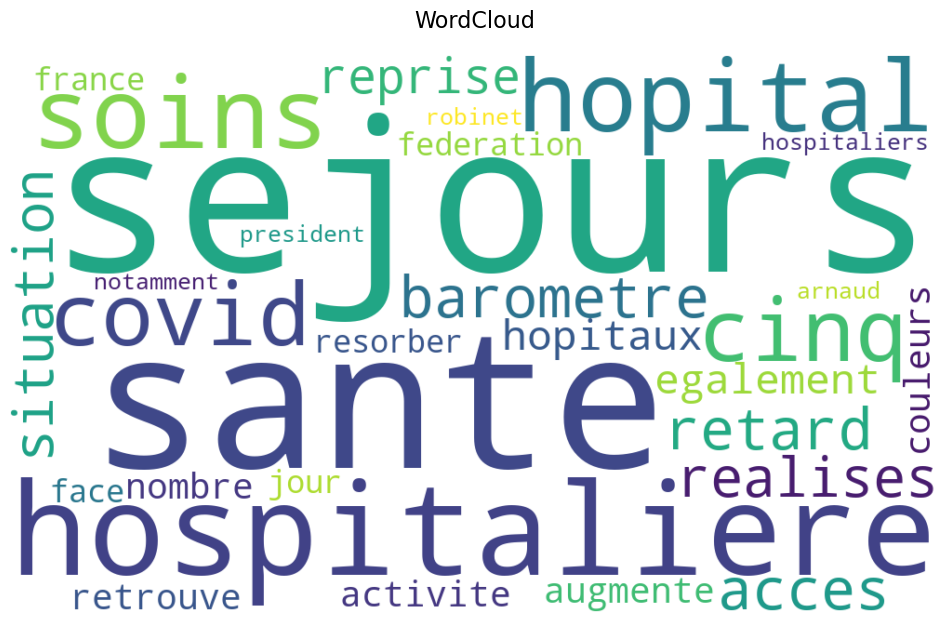

In [9]:
# Création de l'objet WordCloud
wordcloud = WordCloud(
    width=1000, 
    height=600, 
    background_color='white', 
    colormap='viridis',          
    max_words=30,   # Limite à 30 mots
    min_font_size=10,         
    random_state=42           
).generate_from_frequencies(freq)

# Affichage avec Matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud", fontsize=16, pad=20)
plt.show()